In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix



from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [2]:
data = pd.read_csv(r"C:\Users\dell\Desktop\MyDocs\Docs\MK\eeg-headset.csv")

print("First few rows of the dataset: \n")
data.head()

First few rows of the dataset: 



,AF3,F7,F3,FC5,T7,P,O1,O2,P8,T8,FC6,F4,F8,AF4,eye_state
0,4329.23,4009.23,4289.23,4148.21,4350.26,4586.15,4096.92,4641.03,4222.05,4238.46,4211.28,4280.51,4635.90,4393.85,1
1,4324.62,4004.62,4293.85,4148.72,4342.05,4586.67,4097.44,4638.97,4210.77,4226.67,4207.69,4279.49,4632.82,4384.10,1
2,4327.69,4006.67,4295.38,4156.41,4336.92,4583.59,4096.92,4630.26,4207.69,4222.05,4206.67,4282.05,4628.72,4389.23,1
3,4328.72,4011.79,4296.41,4155.90,4343.59,4582.56,4097.44,4630.77,4217.44,4235.38,4210.77,4287.69,4632.31,4396.41,1
4,4326.15,4011.79,4292.31,4151.28,4347.69,4586.67,4095.90,4627.69,4210.77,4244.10,4212.82,4288.21,4632.82,4398.46,1


In [3]:
# Data types and structure
print("\nData Types:")
print(data.dtypes)


Data Types:
AF3          float64
F7           float64
F3           float64
FC5          float64
T7           float64
P            float64
O1           float64
O2           float64
P8           float64
T8           float64
FC6          float64
F4           float64
F8           float64
AF4          float64
eye_state      int64
dtype: object


In [4]:
print(f"\nDataset Shape: {data.shape}")


Dataset Shape: (14980, 15)


In [5]:
print("\nSummary Statistics:")
data.describe()


Summary Statistics:


,AF3,F7,F3,FC5,T7,P,O1,O2,P8,T8,FC6,F4,F8,AF4,eye_state
count,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000
mean,4321.917777,4009.767694,4264.022433,4164.946326,4341.741075,4644.022379,4110.400160,4616.056904,4218.826610,4231.316200,4202.456900,4279.232774,4615.205336,4416.435832,1.448798
std,2492.072174,45.941672,44.428052,5216.404632,34.738821,2924.789537,4600.926543,29.292603,2136.408523,38.050903,37.785981,41.544312,1208.369958,5891.285043,0.497388
min,1030.770000,2830.770000,1040.000000,2453.330000,2089.740000,2768.210000,2086.150000,4567.180000,1357.950000,1816.410000,3273.330000,2257.950000,86.666700,1366.150000,1.000000
25%,4280.510000,3990.770000,4250.260000,4108.210000,4331.790000,4611.790000,4057.950000,4604.620000,4190.770000,4220.510000,4190.260000,4267.690000,4590.770000,4342.050000,1.000000
50%,4294.360000,4005.640000,4262.560000,4120.510000,4338.970000,4617.950000,4070.260000,4613.330000,4199.490000,4229.230000,4200.510000,4276.920000,4603.080000,4354.870000,1.000000
75%,4311.790000,4023.080000,4270.770000,4132.310000,4347.180000,4626.670000,4083.590000,4624.100000,4209.230000,4239.490000,4211.280000,4287.180000,4617.440000,4372.820000,2.000000
max,309231.000000,7804.620000,6880.510000,642564.000000,6474.360000,362564.000000,567179.000000,7264.100000,265641.000000,6674.360000,6823.080000,7002.560000,152308.000000,715897.000000,2.000000


In [6]:
# Check for missing values
missing_values = data.isnull().sum()
print("\n Missing Values per Column: \n")
print(missing_values)


 Missing Values per Column: 

AF3          0
F7           0
F3           0
FC5          0
T7           0
P            0
O1           0
O2           0
P8           0
T8           0
FC6          0
F4           0
F8           0
AF4          0
eye_state    0
dtype: int64


In [7]:
# Check for class imbalance
print("\nClass Distribution of Target (eye_state):\n")
data['eye_state'].value_counts(normalize=True)


Class Distribution of Target (eye_state):



eye_state
1    0.551202
2    0.448798
Name: proportion, dtype: float64

In [8]:
X = data.drop(columns=['eye_state'])
y = data['eye_state']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [9]:
# Stratified splitting to handle class imbalance, 
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, stratify=y, random_state=42
)

print(f"\nTraining set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")


Training set size: 11984
Test set size: 2996


In [10]:
# Define models to be trained
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42)
}

In [11]:
# Model Training
for name, model in models.items():
    model.fit(X_train, y_train)
    print(f"{name} trained.")

Logistic Regression trained.
Decision Tree trained.
Random Forest trained.


In [12]:
for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"\n{name} Performance:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred):.4f}")
    print(f"Recall: {recall_score(y_test, y_pred):.4f}")
    print(f"F1 Score: {f1_score(y_test, y_pred):.4f}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))


Logistic Regression Performance:
Accuracy: 0.5761
Precision: 0.5907
Recall: 0.7517
F1 Score: 0.6615
Confusion Matrix:
[[1241  410]
 [ 860  485]]

Decision Tree Performance:
Accuracy: 0.8258
Precision: 0.8448
Recall: 0.8377
F1 Score: 0.8412
Confusion Matrix:
[[1383  268]
 [ 254 1091]]

Random Forest Performance:
Accuracy: 0.9306
Precision: 0.9197
Recall: 0.9576
F1 Score: 0.9383
Confusion Matrix:
[[1581   70]
 [ 138 1207]]


In [13]:
# Random Forest is Preferred
# XGBoost, CatBoost, and LightGBM are solid options too
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    cv=3,
    scoring='accuracy'
)

grid_search.fit(X_train, y_train)
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Score: {grid_search.best_score_:.4f}")

Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Best Score: 0.9199


In [14]:
# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_test_pred = best_model.predict(X_test)

print("\nRandom Forest Test Performance: \n")
print(f"Accuracy: {accuracy_score(y_test, y_test_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_test_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_test_pred):.4f}")
print(f"F1 Score: {f1_score(y_test, y_test_pred):.4f}")


Random Forest Test Performance: 

Accuracy: 0.9322
Precision: 0.9229
Recall: 0.9570
F1 Score: 0.9396


In [15]:
# Feature importance for Random Forest
importances = best_model.feature_importances_
feature_names = data.drop(columns=['eye_state']).columns

importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importance:\n")
print(importance_df)


Feature Importance:

   Feature  Importance
6       O1    0.118554
5        P    0.106159
1       F7    0.091120
12      F8    0.081121
0      AF3    0.078130
13     AF4    0.077829
11      F4    0.061504
10     FC6    0.060465
3      FC5    0.060417
9       T8    0.058096
7       O2    0.057122
4       T7    0.053955
2       F3    0.050991
8       P8    0.044537


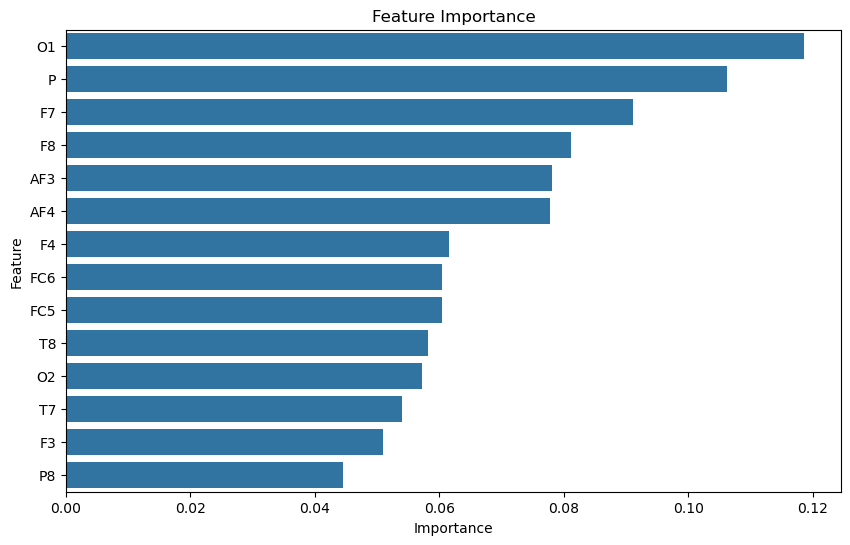

In [16]:
# Let's plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df, x='Importance', y='Feature')
plt.title("Feature Importance")
plt.show()

In [17]:
print("Unique values in y_train:", y_train.unique())
print("Unique values in y_test:", y_test.unique())

Unique values in y_train: [1 2]
Unique values in y_test: [2 1]


In [18]:
xgb_param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'n_estimators': [50, 100, 200],
    'subsample': [0.8, 1.0]
}
y_train = y_train - 1 # Just to remap the labels from 1,2 to 0,1 
y_test = y_test - 1

xgb = XGBClassifier(use_label_encoder=False, random_state=42, eval_metric='logloss')

xgb_grid_search = GridSearchCV(xgb, xgb_param_grid, cv=3, scoring='accuracy')
xgb_grid_search.fit(X_train, y_train)

print(f"XGBoost Best Parameters: {xgb_grid_search.best_params_}")
print(f"XGBoost Best Score: {xgb_grid_search.best_score_:.4f}")

C:\Users\dell\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [05:31:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\dell\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [05:31:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\dell\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [05:31:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\dell\anaconda3\Lib\site-packages\xgbo

XGBoost Best Parameters: {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.8}
XGBoost Best Score: 0.9343


In [19]:
lgbm_param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [-1, 10, 20],
    'n_estimators': [50, 100, 200],
    'num_leaves': [31, 50, 100]
}

lgbm = LGBMClassifier(random_state=42, verbosity = -1)

lgbm_grid_search = GridSearchCV(lgbm, lgbm_param_grid, cv=3, scoring='accuracy')
lgbm_grid_search.fit(X_train, y_train)

print(f"LightGBM Best Parameters: {lgbm_grid_search.best_params_}")
print(f"LightGBM Best Score: {lgbm_grid_search.best_score_:.4f}")

LightGBM Best Parameters: {'learning_rate': 0.2, 'max_depth': -1, 'n_estimators': 200, 'num_leaves': 100}
LightGBM Best Score: 0.9447


In [20]:
catboost_param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'depth': [6, 8, 10],
    'iterations': [50, 100, 200],
    'l2_leaf_reg': [1, 3, 5]
}

catboost = CatBoostClassifier(random_state=42, verbose=0)

catboost_grid_search = GridSearchCV(catboost, catboost_param_grid, cv=3, scoring='accuracy')
catboost_grid_search.fit(X_train, y_train)

print(f"CatBoost Best Parameters: {catboost_grid_search.best_params_}")
print(f"CatBoost Best Score: {catboost_grid_search.best_score_:.4f}")

CatBoost Best Parameters: {'depth': 10, 'iterations': 200, 'l2_leaf_reg': 1, 'learning_rate': 0.2}
CatBoost Best Score: 0.9420


In [21]:
# Evaluate XGBoost
xgb_best = xgb_grid_search.best_estimator_
xgb_pred = xgb_best.predict(X_test)
print("\nXGBoost Test Performance:")
print(f"Accuracy: {accuracy_score(y_test, xgb_pred):.4f}")
print(f"Precision: {precision_score(y_test, xgb_pred):.4f}")
print(f"Recall: {recall_score(y_test, xgb_pred):.4f}")
print(f"F1 Score: {f1_score(y_test, xgb_pred):.4f}")

# Evaluate LightGBM
lgbm_best = lgbm_grid_search.best_estimator_
lgbm_pred = lgbm_best.predict(X_test)
print("\nLightGBM Test Performance:")
print(f"Accuracy: {accuracy_score(y_test, lgbm_pred):.4f}")
print(f"Precision: {precision_score(y_test, lgbm_pred):.4f}")
print(f"Recall: {recall_score(y_test, lgbm_pred):.4f}")
print(f"F1 Score: {f1_score(y_test, lgbm_pred):.4f}")

# Evaluate CatBoost
catboost_best = catboost_grid_search.best_estimator_
catboost_pred = catboost_best.predict(X_test)
print("\nCatBoost Test Performance:")
print(f"Accuracy: {accuracy_score(y_test, catboost_pred):.4f}")
print(f"Precision: {precision_score(y_test, catboost_pred):.4f}")
print(f"Recall: {recall_score(y_test, catboost_pred):.4f}")
print(f"F1 Score: {f1_score(y_test, catboost_pred):.4f}")


XGBoost Test Performance:
Accuracy: 0.9476
Precision: 0.9453
Recall: 0.9375
F1 Score: 0.9414

LightGBM Test Performance:
Accuracy: 0.9576
Precision: 0.9593
Recall: 0.9457
F1 Score: 0.9525

CatBoost Test Performance:
Accuracy: 0.9576
Precision: 0.9593
Recall: 0.9457
F1 Score: 0.9525


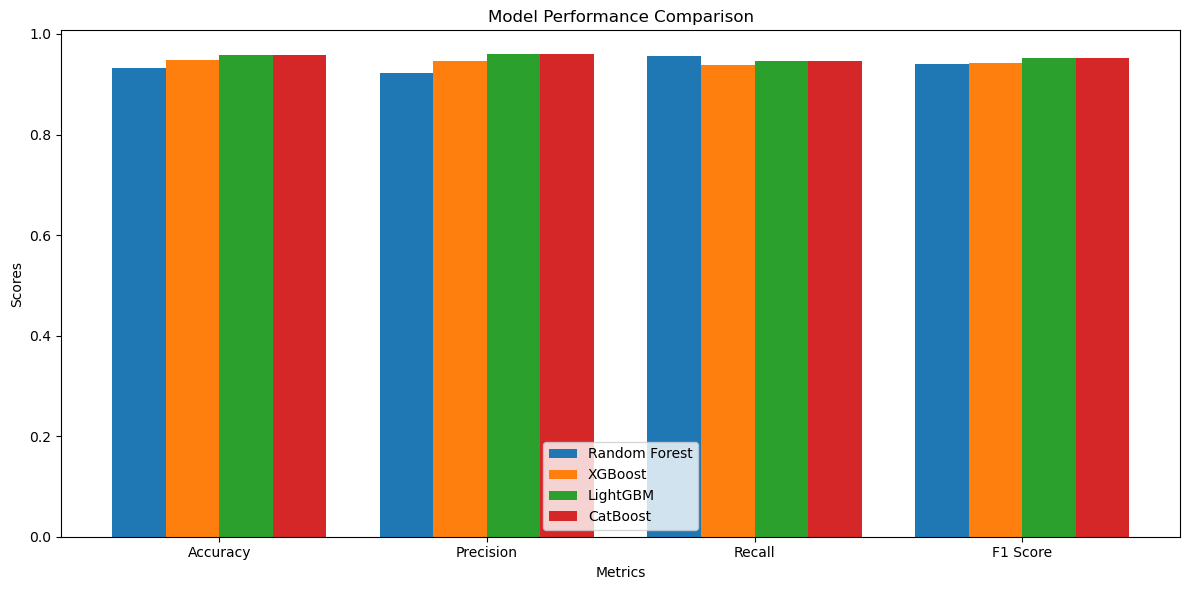

In [22]:
models = ['Random Forest', 'XGBoost', 'LightGBM', 'CatBoost']
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
scores = {model: [] for model in models}


# Evaluate Random Forest Model
y_test_rf = y_test + 1
best_model = grid_search.best_estimator_
y_test_pred = best_model.predict(X_test)
scores['Random Forest'].append(accuracy_score(y_test_rf, y_test_pred))
scores['Random Forest'].append(precision_score(y_test_rf, y_test_pred))
scores['Random Forest'].append(recall_score(y_test_rf, y_test_pred))
scores['Random Forest'].append(f1_score(y_test_rf, y_test_pred))

# Evaluate XGBoost
xgb_best = xgb_grid_search.best_estimator_
xgb_pred = xgb_best.predict(X_test)
scores['XGBoost'].append(accuracy_score(y_test, xgb_pred))
scores['XGBoost'].append(precision_score(y_test, xgb_pred))
scores['XGBoost'].append(recall_score(y_test, xgb_pred))
scores['XGBoost'].append(f1_score(y_test, xgb_pred))

# Evaluate LightGBM
lgbm_best = lgbm_grid_search.best_estimator_
lgbm_pred = lgbm_best.predict(X_test)
scores['LightGBM'].append(accuracy_score(y_test, lgbm_pred))
scores['LightGBM'].append(precision_score(y_test, lgbm_pred))
scores['LightGBM'].append(recall_score(y_test, lgbm_pred))
scores['LightGBM'].append(f1_score(y_test, lgbm_pred))

# Evaluate CatBoost
catboost_best = catboost_grid_search.best_estimator_
catboost_pred = catboost_best.predict(X_test)
scores['CatBoost'].append(accuracy_score(y_test, catboost_pred))
scores['CatBoost'].append(precision_score(y_test, catboost_pred))
scores['CatBoost'].append(recall_score(y_test, catboost_pred))
scores['CatBoost'].append(f1_score(y_test, catboost_pred))

data = np.array([scores[model] for model in models])

# Plot the metrics
x = np.arange(len(metrics))  
width = 0.2  

fig, ax = plt.subplots(figsize=(12, 6))

for i, model in enumerate(models):
    ax.bar(x + i * width - 1.5 * width, data[i], width, label=model)

ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Model Performance Comparison')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

plt.tight_layout()
plt.show()

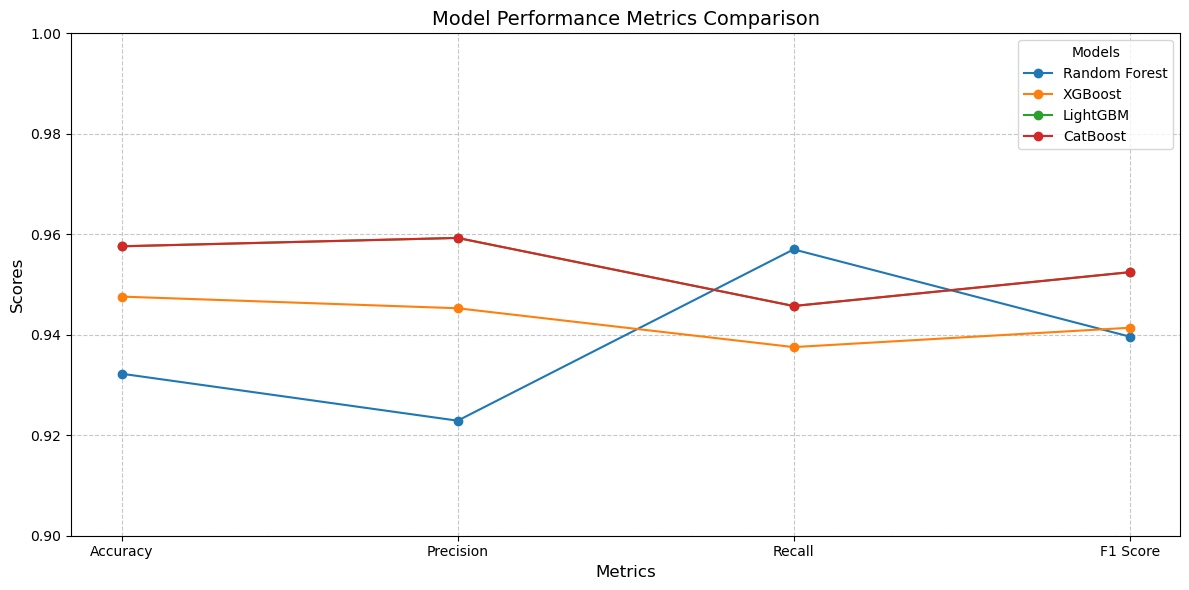

In [23]:
# Let's plot line chart for model metrics
plt.figure(figsize=(12, 6))

for model in models:
    plt.plot(metrics, scores[model], marker='o', label=model)

plt.title('Model Performance Metrics Comparison', fontsize=14)
plt.xlabel('Metrics', fontsize=12)
plt.ylabel('Scores', fontsize=12)
plt.ylim(0.9, 1.0)  # We are assuming scores are between 0.9 and 1 for better visualization
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title='Models', fontsize=10)

plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()